In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
from sklearn.metrics import accuracy_score, roc_curve

In [74]:
X = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_train.data', sep = ' ', header= None)
y = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_train.labels', header = None)
Xt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_valid.data', sep = ' ', header = None)
yt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_valid.labels', header= None)

In [75]:
X = X.drop(5000, axis = 1)

In [76]:
Xt = Xt.drop(5000, axis = 1)

In [77]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xts = scaler.transform(Xt)

In [78]:
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
Xts = np.hstack([np.ones((Xts.shape[0], 1)), Xts])

In [79]:
y = np.where(y == -1, 0, 1)
yt = np.where(yt == -1, 0, 1)

In [80]:
def threshold(x, ld):
    return np.where(np.abs(x) < ld, 0, x)

In [81]:
lrate = 1/Xs.shape[0]
iter = 100

w = np.zeros(Xs.shape[1])
for _ in range(iter):
    y = y.squeeze()
    Xw = np.matmul(Xs,w)
    grad = np.matmul(Xs.T, y - expit(Xw))
    w = threshold(w + lrate*grad, 0.0385)

In [82]:
np.count_nonzero(w)

503

In [83]:
def fit(X, y, ld = 1, iter = 100):
    lrate = 1/X.shape[0]
    w = np.zeros(X.shape[1])
    for _ in range(iter):
        y = y.squeeze()
        Xw = np.matmul(X, w)
        grad = np.matmul(X.T, y - expit(Xw))
        w = threshold(w + lrate*grad, ld)
    return w


In [84]:
def fit_w_iter(X,y, ld = 1, iter = 100):
    w_iter = []
    lrate = 1/X.shape[0]
    w = np.zeros(X.shape[1])
    for _ in range(iter):
        y = y.squeeze()
        Xw = np.matmul(X, w)
        grad = np.matmul(X.T, y - expit(Xw))
        w = threshold(w + lrate*grad, ld)
        w_iter.append(w)
    return w_iter

In [85]:
def n_feat(w):
    return np.count_nonzero(w)

In [86]:
w_500 = fit(Xs, y, ld = 0.0385)
n_feat(w_500)

503

In [87]:
w_300 = fit(Xs, y, ld = 0.053)
n_feat(w_300)

299

In [88]:
w_100 = fit(Xs, y, ld = 0.088)
n_feat(w_100)

98

In [89]:
w_30 = fit(Xs, y, ld = 0.133)
n_feat(w_30)

30

In [90]:
w_10 = fit(Xs, y, ld = 0.19)
n_feat(w_10)

10

In [91]:
Xw_10 = np.matmul(Xs, w_10)
pred_y_10 = np.where(expit(Xw_10) > 0.5, 1, 0)
accuracy_score(pred_y_10, y)

0.8786666666666667

In [92]:
def score(X, y, w):
    Xw = np.matmul(X,w)
    p = np.where(expit(Xw) > 0.5, 1, 0)
    return accuracy_score(p, y)

In [93]:
score(Xs, y, w_10)

0.8786666666666667

In [94]:
def misclass(X,y,w):
    Xw = np.matmul(X,w)
    pred = np.where(expit(Xw) > 0.5, 1, 0)
    return (1 - accuracy_score(pred, y))

In [95]:
misclass(Xs, y, w_10)

0.1213333333333333

In [96]:
w_100_iter = fit_w_iter(Xs, y, ld = 0.088)

In [97]:
def misclass_w_iter(X, y, w_iter):
    mis = []
    for w in w_iter:
        mis.append(1 - score(X,y,w))
    return mis

In [98]:
mis_100_w = misclass_w_iter(Xs, y, w_100_iter)

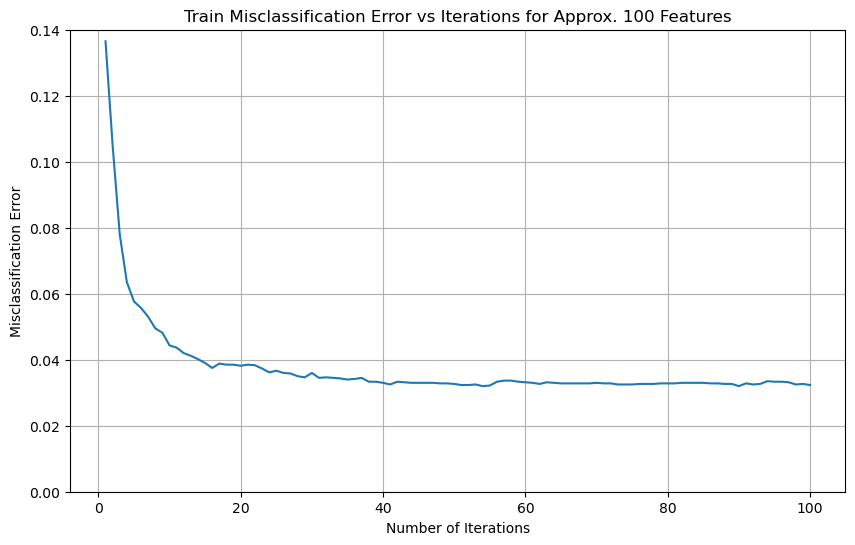

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(1,101), mis_100_w)
plt.grid()
plt.title('Train Misclassification Error vs Iterations for Approx. 100 Features')
plt.xlabel('Number of Iterations')
plt.ylabel('Misclassification Error')
plt.ylim(0, 0.14)
plt.show()

In [100]:
fin_w = [w_10, w_30, w_100, w_300, w_500]
misclass_fin_train = []
misclass_fin_test = []
for w in fin_w:
    misclass_fin_train.append(misclass(Xs, y, w))
    misclass_fin_test.append(misclass(Xts, yt, w))

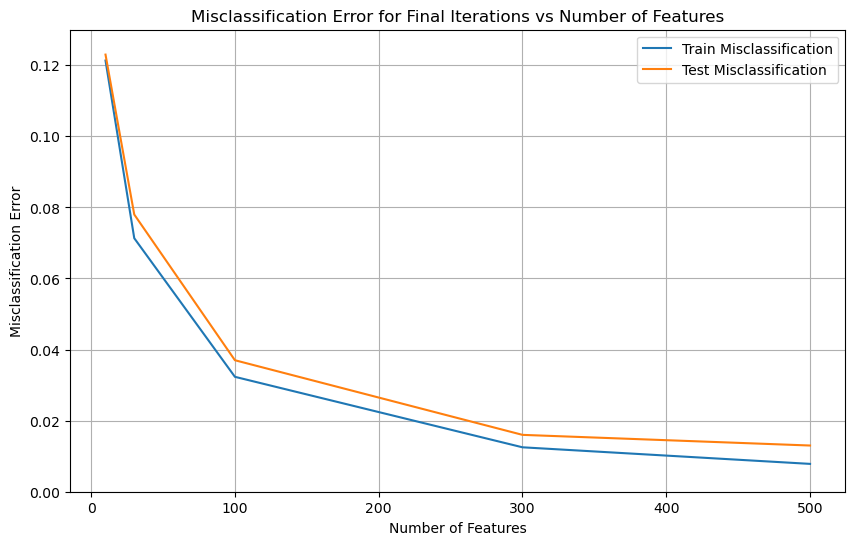

In [101]:
plt.figure(figsize=(10,6))
plt.plot([10,30,100,300,500], misclass_fin_train, label = 'Train Misclassification')
plt.plot([10,30,100,300,500], misclass_fin_test, label = 'Test Misclassification')
plt.title('Misclassification Error for Final Iterations vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.ylim(0,0.13)
plt.legend()
plt.show()

In [102]:
misclass_fin_test

[0.123,
 0.07799999999999996,
 0.03700000000000003,
 0.016000000000000014,
 0.013000000000000012]

In [103]:
misclass_fin_train

[0.1213333333333333,
 0.07133333333333336,
 0.032333333333333325,
 0.012499999999999956,
 0.007833333333333359]

In [104]:
prob_y_100 = expit(np.matmul(Xs, w_100))
prob_yt_100 = expit(np.matmul(Xts, w_100))

In [105]:
fpr_train, tpr_train, _ = roc_curve(y, prob_y_100)
fpr_test, tpr_test, _ = roc_curve(yt, prob_yt_100)

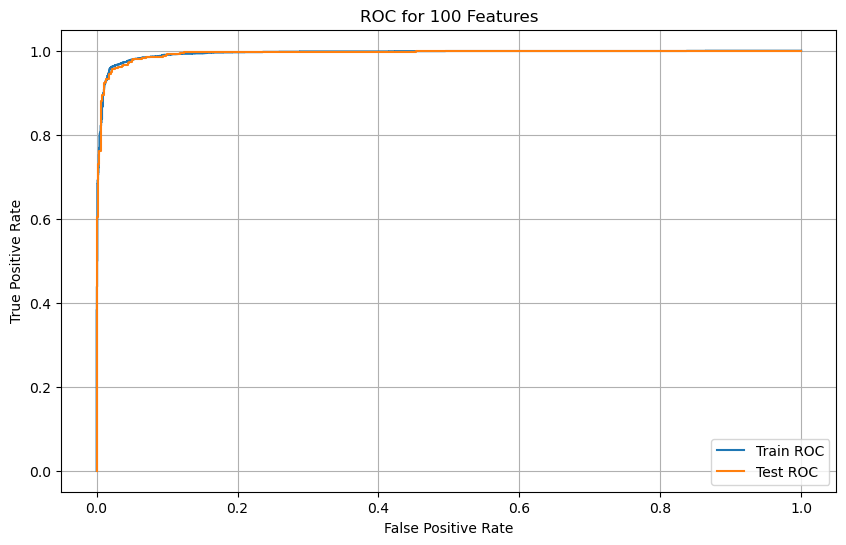

In [106]:
plt.figure(figsize=(10,6))
plt.plot(fpr_train, tpr_train, label= 'Train ROC')
plt.plot(fpr_test, tpr_test, label = 'Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 100 Features')
plt.grid()
plt.legend()
plt.show()

# Madelon Dataset

In [168]:
X = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_train.data', sep = ' ', header= None)
y = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_train.labels', header = None)
Xt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_valid.data', sep = ' ', header = None)
yt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_valid.labels', header= None)

In [169]:
X = X.drop(500, axis = 1)
Xt = Xt.drop(500, axis= 1)

In [170]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xts = scaler.transform(Xt)

In [171]:
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
Xts = np.hstack([np.ones((Xts.shape[0], 1)), Xts])

In [172]:
y = np.where(y == -1, 0, 1)
yt = np.where(yt == -1, 0, 1)

In [236]:
w_10 = fit(Xs, y, ld = 0.0298)
n_feat(w_10)

8

In [222]:
w_30 = fit(Xs, y, ld = 0.0242)
n_feat(w_30)

31

In [201]:
w_100 = fit(Xs, y, ld = 0.017)
n_feat(w_100)

101

In [192]:
w_300 = fit(Xs, y, ld = 0.00735)
n_feat(w_300)

302

In [178]:
w_500 = fit(Xs, y, ld = 0.00002)
n_feat(w_500)

501

In [238]:
w_100_iter = fit_w_iter(Xs, y, ld = 0.017)

In [239]:
mis_100_w = misclass_w_iter(Xs, y, w_100_iter)

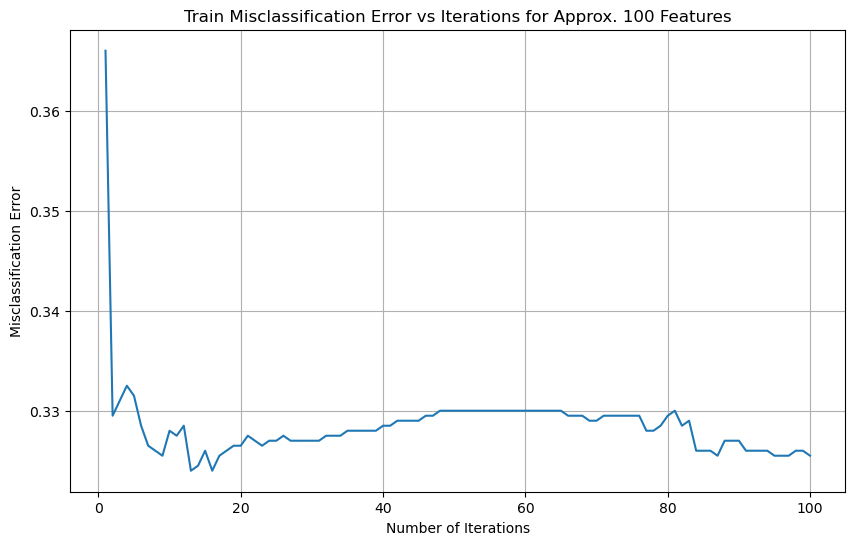

In [240]:
plt.figure(figsize=(10,6))
plt.plot(range(1,101), mis_100_w)
plt.grid()
plt.title('Train Misclassification Error vs Iterations for Approx. 100 Features')
plt.xlabel('Number of Iterations')
plt.ylabel('Misclassification Error')
plt.show()

In [241]:
fin_w = [w_10, w_30, w_100, w_300, w_500]
misclass_fin_train = []
misclass_fin_test = []
for w in fin_w:
    misclass_fin_train.append(misclass(Xs, y, w))
    misclass_fin_test.append(misclass(Xts, yt, w))

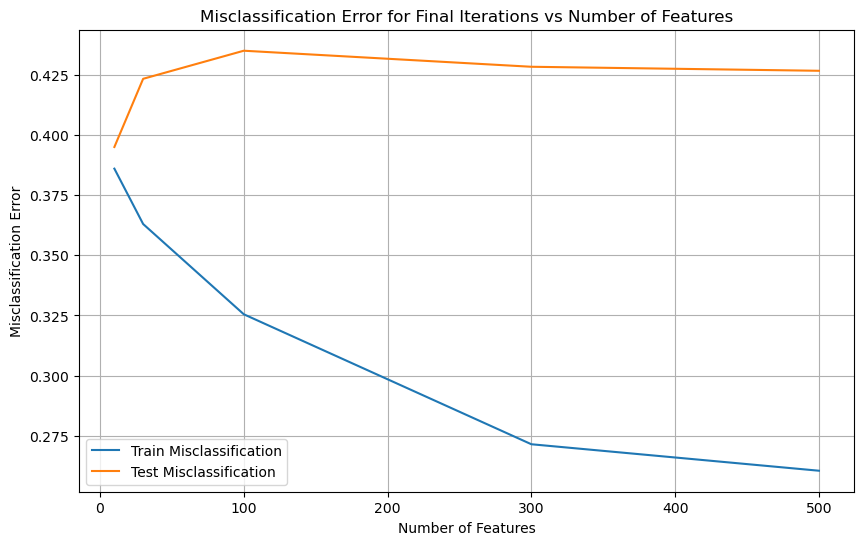

In [242]:
plt.figure(figsize=(10,6))
plt.plot([10,30,100,300,500], misclass_fin_train, label = 'Train Misclassification')
plt.plot([10,30,100,300,500], misclass_fin_test, label = 'Test Misclassification')
plt.title('Misclassification Error for Final Iterations vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend()
plt.show()

In [245]:
misclass_fin_test

[0.395,
 0.42333333333333334,
 0.43500000000000005,
 0.42833333333333334,
 0.42666666666666664]

In [246]:
misclass_fin_train

[0.386, 0.363, 0.3255, 0.27149999999999996, 0.26049999999999995]

In [243]:
prob_y_100 = expit(np.matmul(Xs, w_100))
prob_yt_100 = expit(np.matmul(Xts, w_100))
fpr_train, tpr_train, _ = roc_curve(y, prob_y_100)
fpr_test, tpr_test, _ = roc_curve(yt, prob_yt_100)

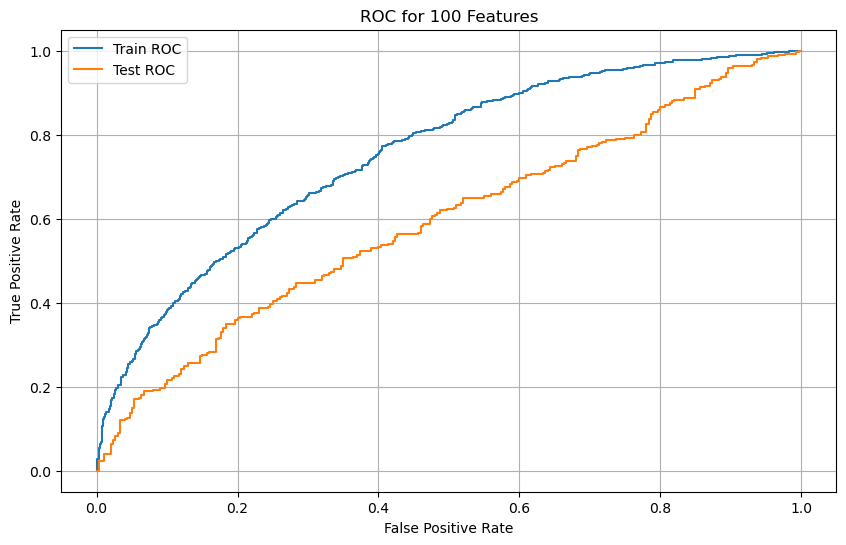

In [244]:
plt.figure(figsize=(10,6))
plt.plot(fpr_train, tpr_train, label= 'Train ROC')
plt.plot(fpr_test, tpr_test, label = 'Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 100 Features')
plt.grid()
plt.legend()
plt.show()

# Dexter Dataset

In [126]:
X = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_train.csv', header= None)
y = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_train.labels', header = None)
Xt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_valid.csv', header= None)
yt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_valid.labels', header = None)

In [127]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xts = scaler.transform(Xt)

In [128]:
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
Xts = np.hstack([np.ones((Xts.shape[0], 1)), Xts])

In [129]:
y = np.where(y == -1, 0, 1)
yt = np.where(yt == -1, 0, 1)

In [130]:
w_10 = fit(Xs, y, ld = 0.14)
n_feat(w_10)

11

In [131]:
w_30 = fit(Xs, y, ld = 0.099)
n_feat(w_30)

29

In [132]:
w_100 = fit(Xs, y, ld = 0.071)
n_feat(w_100)

101

In [133]:
w_300 = fit(Xs, y, ld = 0.0523)
n_feat(w_300)

299

In [134]:
w_500 = fit(Xs, y, ld = 0.0466)
n_feat(w_500)

500

In [135]:
w_100_iter = fit_w_iter(Xs, y, ld = 0.071)

In [136]:
mis_100_w = misclass_w_iter(Xs, y, w_100_iter)

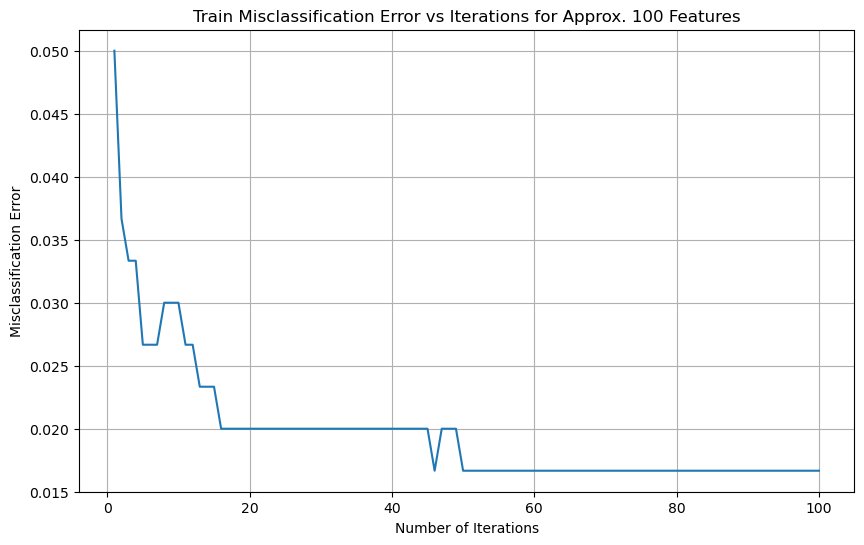

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,101), mis_100_w)
plt.grid()
plt.title('Train Misclassification Error vs Iterations for Approx. 100 Features')
plt.xlabel('Number of Iterations')
plt.ylabel('Misclassification Error')
plt.show()

In [138]:
fin_w = [w_10, w_30, w_100, w_300, w_500]
misclass_fin_train = []
misclass_fin_test = []
for w in fin_w:
    misclass_fin_train.append(misclass(Xs, y, w))
    misclass_fin_test.append(misclass(Xts, yt, w))

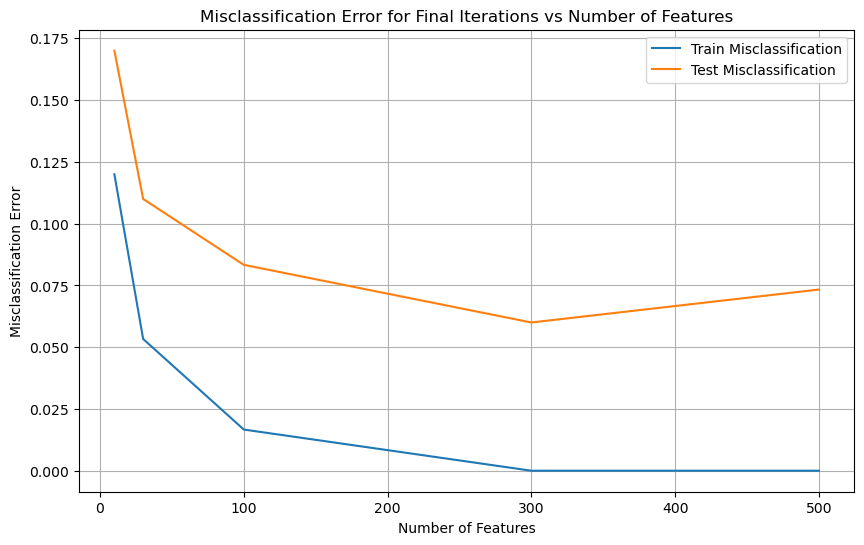

In [139]:
plt.figure(figsize=(10,6))
plt.plot([10,30,100,300,500], misclass_fin_train, label = 'Train Misclassification')
plt.plot([10,30,100,300,500], misclass_fin_test, label = 'Test Misclassification')
plt.title('Misclassification Error for Final Iterations vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend()
plt.show()

In [140]:
misclass_fin_test

[0.17000000000000004,
 0.10999999999999999,
 0.08333333333333337,
 0.06000000000000005,
 0.07333333333333336]

In [141]:
misclass_fin_train

[0.12, 0.053333333333333344, 0.01666666666666672, 0.0, 0.0]

In [142]:
prob_y_100 = expit(np.matmul(Xs, w_100))
prob_yt_100 = expit(np.matmul(Xts, w_100))
fpr_train, tpr_train, _ = roc_curve(y, prob_y_100)
fpr_test, tpr_test, _ = roc_curve(yt, prob_yt_100)

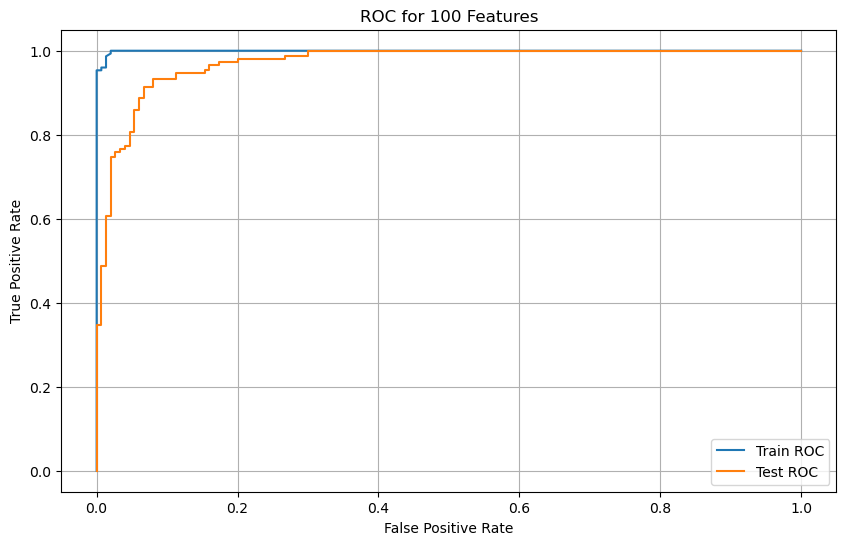

In [143]:
plt.figure(figsize=(10,6))
plt.plot(fpr_train, tpr_train, label= 'Train ROC')
plt.plot(fpr_test, tpr_test, label = 'Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 100 Features')
plt.grid()
plt.legend()
plt.show()